### Gambler problem

In [7]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# final winning amount $100
final_amount = 100

# all states, including state 0 and state 100
states = np.arange(final_amount + 1)

# probability of head
headProb = 0.4

# optimal policy
policy = np.zeros(final_amount + 1)

# state value
stateValue = np.zeros(final_amount + 1)
stateValue[final_amount] = 1.0

In [9]:
# value iteration
while True:
    delta = 0.0
    for state in states[1:final_amount]:
        # get possilbe actions for current state
        actions = np.arange(min(state, final_amount - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break
        #ignore lower values

In [10]:
# calculate the optimal policy
for state in states[1:final_amount]:
    actions = np.arange(min(state, final_amount - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
    
    policy[state] = actions[np.argmax(actionReturns)]

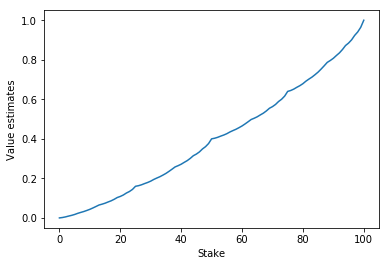

In [13]:
# figure 4.3
plt.figure(1)
plt.xlabel('Stake')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.show()

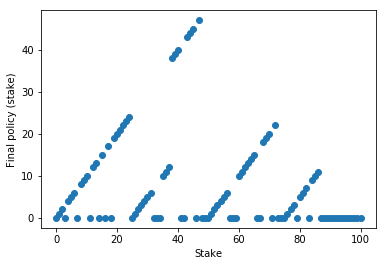

In [14]:
plt.figure(2)
plt.scatter(states, policy)
plt.xlabel('Stake')
plt.ylabel('Final policy (stake)')
plt.show()